In [1]:
import pandas as pd 
titanic= pd.read_csv ('/root/Downloads/titanic-passengers.csv', sep=';')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
survie={"No":0,"Yes":1}
titanic.replace({'Survived':survie}, inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
titanic['Age'].fillna(titanic.Age.mean(), inplace=True)
sex={'male':1,'female':0}
titanic.replace({"Sex":sex}, inplace=True)


In [4]:
x=titanic[['Pclass','Sex','Age','SibSp','Parch']]
y=titanic['Survived']

In [5]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


# decision tree


In [69]:
import numpy as np 
from sklearn import tree
from sklearn.metrics import accuracy_score
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predict=classifier.predict(x_test)



In [70]:
print('score: ', accuracy_score(y_test,predict))

score:  0.8432835820895522


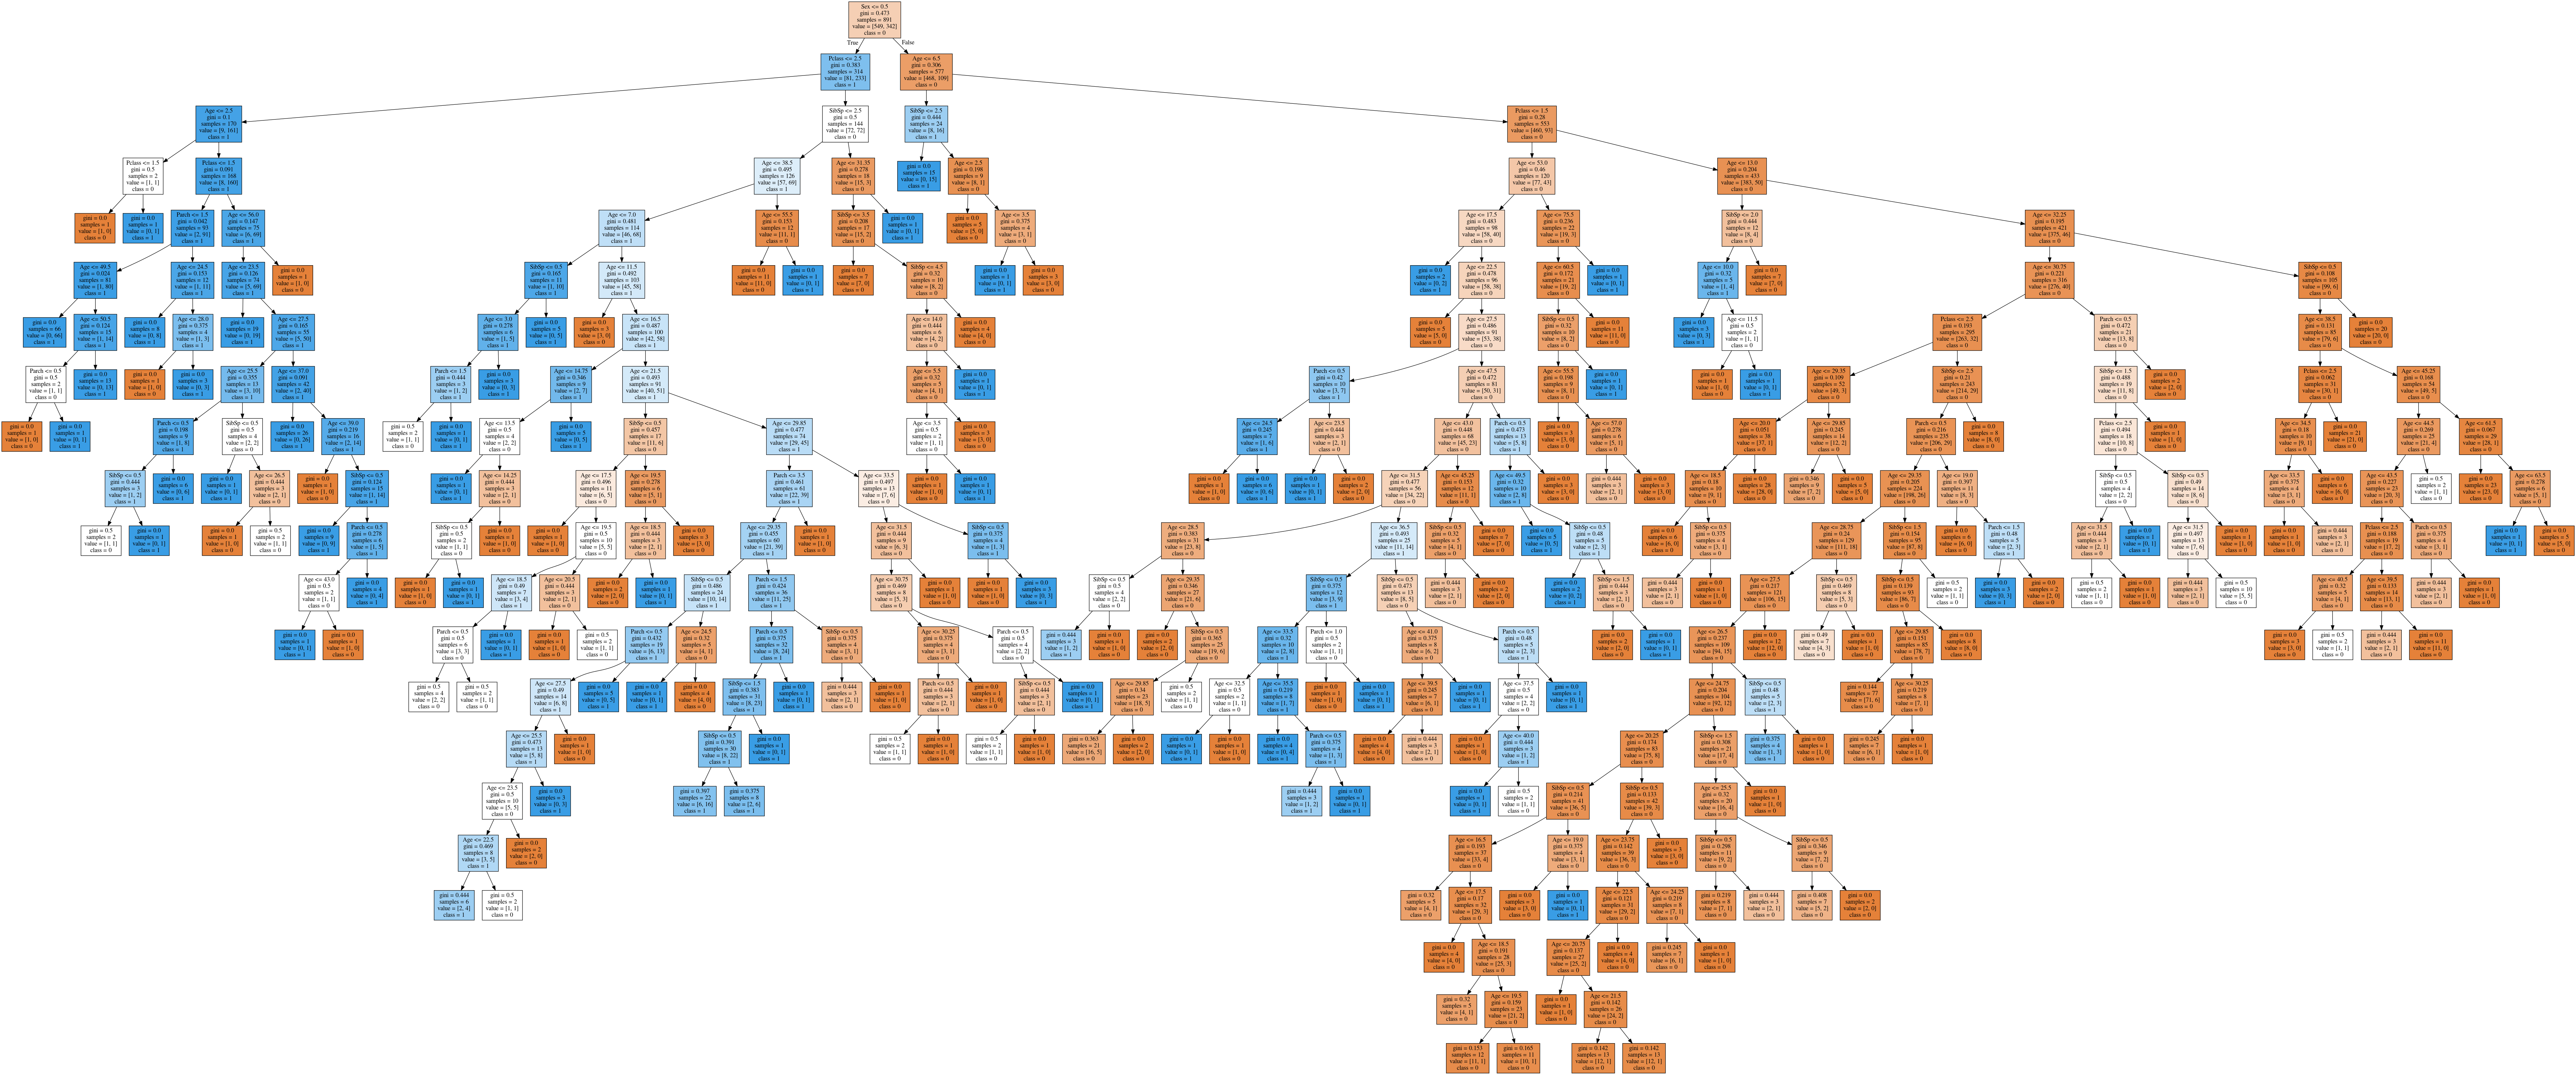

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from IPython.display import Image
from graphviz import Source
from IPython.display import display


# class labels
labels = ['Pclass','Sex','Age','SibSp','Parch']


estimator = DecisionTreeClassifier()
estimator.fit(x, y)

graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=labels, class_names=['0', '1', '2'] , filled = True))
display(Image(graph.pipe(format='png')))

In [88]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic['Embarked'].fillna('S', inplace=True)



In [17]:
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embarked={"S":0,"C":1,"Q":2}
titanic.replace({'Embarked':embarked},inplace=True)

In [50]:
x01=titanic[['Pclass','Sex','Age','Fare','Embarked']]
x01_train,x01_test,y01_train,y01_test=train_test_split(x01,y, test_size=0.3)
classifier01=tree.DecisionTreeClassifier()
classifier01.fit(x01_train,y01_train)
predict01=classifier01.predict(x01_test)
print('score: ',accuracy_score(y01_test,predict01))

score:  0.7798507462686567


In [46]:
x02=titanic[['Pclass','SibSp','Parch','Fare','Embarked']]
x02_train,x02_test,y02_train,y02_test=train_test_split(x02,y, test_size=0.3)
classifier02=tree.DecisionTreeClassifier()
classifier02.fit(x02_train,y02_train)
predict02=classifier02.predict(x02_test)
print('score: ',accuracy_score(y02_test,predict02))

score:  0.6455223880597015


In [77]:
x03=titanic[['Pclass','Age','Fare','Sex']]
x03_train,x03_test,y03_train,y03_test=train_test_split(x03,y, test_size=0.3)
classifier03=tree.DecisionTreeClassifier()
classifier03.fit(x03_train,y03_train)
predict03=classifier03.predict(x03_test)
print('score: ',accuracy_score(y03_test,predict03))

score:  0.7910447761194029


In [80]:
x04=titanic[['Pclass','Age','Sex']]
x04_train,x04_test,y04_train,y04_test=train_test_split(x04,y, test_size=0.3)
classifier04=tree.DecisionTreeClassifier()
classifier04.fit(x04_train,y04_train)
predict04=classifier04.predict(x04_test)
print('score: ',accuracy_score(y04_test,predict04))

score:  0.835820895522388


After changing many times the parameters of our prediction model, the features that give us the best accuracy are 'Sex','Pclass','Age','SibSp' and 'Parch'

# Random Forest



In [43]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.832089552238806


In [42]:
clf01=RandomForestClassifier(n_estimators=100)
clf01.fit(x01_train,y01_train)
y_pred01=clf01.predict(x01_test)
print("accuracy:",accuracy_score(y01_test,y_pred01))

accuracy: 0.7873134328358209


In [41]:
clf010=RandomForestClassifier(n_estimators=93)
clf010.fit(x_train,y_train)
y_pred010=clf010.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred010))

accuracy: 0.832089552238806


In [40]:
clf011=RandomForestClassifier(n_estimators=200)
clf011.fit(x_train,y_train)
y_pred011=clf011.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred011))

accuracy: 0.835820895522388


In [39]:
clf010=RandomForestClassifier(n_estimators=23)
clf010.fit(x_train,y_train)
y_pred010=clf010.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred010))

accuracy: 0.832089552238806


In [44]:
clf011=RandomForestClassifier(n_estimators=133)
clf011.fit(x_train,y_train)
y_pred011=clf011.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred011))

accuracy: 0.832089552238806


Even when we change the estimators, we get the same accuracy.  